In [312]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [313]:
Unemp= pd.read_csv('DP_LIVE_10012020131736460 Unemployment Rate OECD.csv')
GDP= pd.read_csv('gdp_csv.csv')
HDI= pd.read_csv('archive (2)/human-development-index.csv')
df=pd.read_csv('inflation interest unemployment.csv')

In [314]:
#filt_ausnjpn = df['country']==('Australia' or 'Japan') why this do not work?
#filt_jpn = df['country']=='Japan'
#df[filt_ausnjpn].country.unique()

df_aus_jpn=df.query('Country== ["Australia", "Japan"]')

UndefinedVariableError: name 'Country' is not defined

In [326]:
#To rename the columns for easier access
Unemp.rename(columns={'LOCATION':'Country', 'TIME': 'Year'}, inplace=True)
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
df.rename(columns={'country': 'Country', 'year': 'Year', 'Inflation, consumer prices (annual %)': 'Inflation rate'}, inplace=True)
#To replace country codes of Australia and Japan 
Unemp.replace(['AUS', 'JPN'], ['Australia', 'Japan'], inplace=True)

 1) Relationship between Unemployment and GDP
 1.1) Find the mean Unemp in 2020 of Aus and Jpn
 1.2) Merge Aus and Jpn datasets
 1.3) Plot relationship pre 1970s, during oil crisis, after 2000s

In [ ]:
#Filtering unemployment data by Country and types within the  year of 1967 to 2018
Aus_unemp = Unemp[(Unemp['Country']=='Australia') & (Unemp['SUBJECT']== 'TOT')]
Jpn_unemp = Unemp[(Unemp['Country']=='Japan') & (Unemp['SUBJECT']=='TOT')]

yearrange= range(1967, 2019)
year_lst=[]
for i in yearrange:
    year_lst.append(str(i))    
    
Aus_unemp=Aus_unemp[Aus_unemp['Year'].isin(year_lst)]
Aus_unemp['Year']=pd.to_numeric(Aus_unemp['Year'])

Jpn_unemp=Jpn_unemp[Jpn_unemp['Year'].isin(year_lst)]
Jpn_unemp['Year']=pd.to_numeric(Jpn_unemp['Year'])

In [ ]:
#Filtering GDP data by country
Aus_GDP = GDP[GDP['Country']=='Australia']
Jpn_GDP = GDP[GDP['Country']=='Japan']
Aus_GDP.info()

In [327]:
#Filtering inflation data by country
df_aus=df.query('Country=="Australia"')
df_jpn=df.query('Country=="Japan"')

In [328]:
#Merging Unemployment, GDP and Inflation data and dropping insignificant columns
Aus_GDP_Unemp = pd.merge(Aus_GDP, Aus_unemp, on=['Country', 'Year'], suffixes=('_GDP', '_Unemp'))
Jpn_GDP_Unemp = pd.merge(Jpn_GDP, Jpn_unemp, on=['Country','Year'], suffixes=('_GDP', '_Unemp'))
Aus = pd.merge(Aus_GDP_Unemp, df_aus, on=['Country', 'Year'])
Jpn = pd.merge(Jpn_GDP_Unemp, df_jpn, on=['Country', 'Year'])


list_drop_col=[]
for i in Aus.columns:
    if i not in ['Country', 'Year', 'Value_GDP', 'Value_Unemp', 'Inflation rate', 'Deposit interest rate (%)']:
        list_drop_col.append(i)

Aus_df=Aus.drop(columns=list_drop_col)      
Jpn_df=Jpn.drop(columns=list_drop_col)      

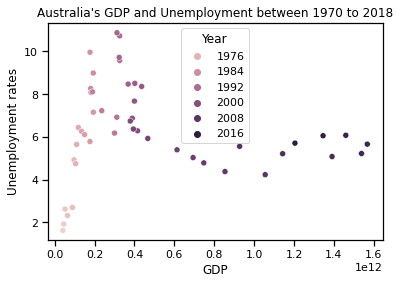

In [316]:
#Relationship between GDP and Unemployment in Australia 
g=sns.scatterplot(data=Aus_df, x='Value_GDP', y='Value_Unemp', hue='Year')
g.set_title("Australia's GDP and Unemployment between 1970 to 2018")
g.set(xlabel='GDP', ylabel='Unemployment rates')
plt.show()

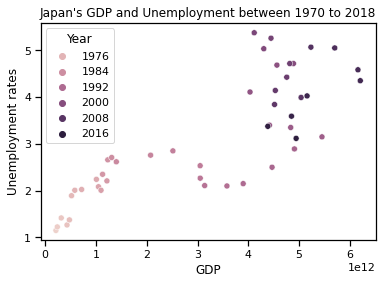

In [317]:
#Relationship between GDP and Unemployment in Japan
h=sns.scatterplot(data=Jpn_df, x='Value_GDP', y='Value_Unemp', hue='Year')
h.set_title("Japan's GDP and Unemployment between 1970 to 2018")
h.set(xlabel='GDP', ylabel='Unemployment rates')
plt.show()

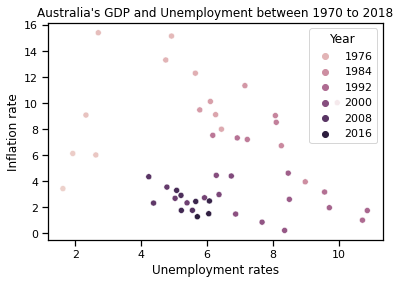

In [351]:
#Relationship between Unemployment in Inflation in Australia
j= sns.scatterplot(data=Aus_df, x='Value_Unemp', y= 'Inflation rate', hue='Year')
j.set_title("Australia's GDP and Unemployment between 1970 to 2018")
j.set(xlabel='Unemployment rates')
plt.show()


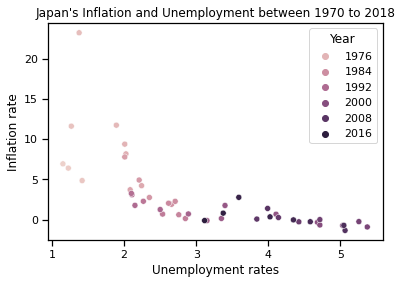

In [350]:
#Relationship between Unemployment in Inflation in Japan
k= sns.scatterplot(data=Jpn_df, x='Value_Unemp', y= 'Inflation rate', hue='Year')
k.set_title("Japan's Inflation and Unemployment between 1970 to 2018")
k.set(xlabel='Unemployment rates')
plt.show()

In [320]:
#Correlation between GDP, Unemployment, Inflation and interest rates
def corrmap(x):
    corr_x=x.corr(method='pearson')
    sns.heatmap(data=corr_x, cmap='coolwarm')
    plt.show()

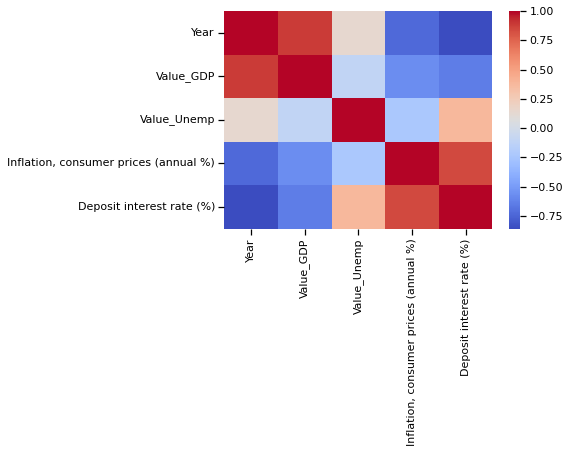

In [321]:
corrmap(Aus_df)